In [28]:
import pandas as pd
import matplotlib.pyplot as mplot
#mplot.switch_backend("TKAgg")

In [26]:
data = pd.read_csv('dataset/fifa.csv')

## 1. Visualisasi Data

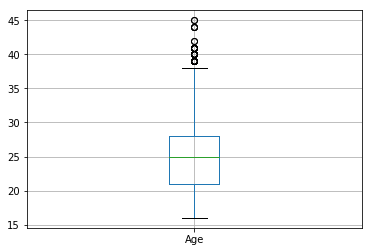

In [31]:
data.boxplot()
mplot.show()

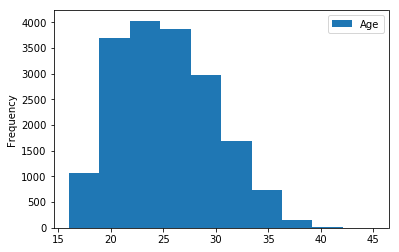

In [18]:
data.plot(kind = 'hist')
mplot.show()

## 2. Statistical Description

Minimum value untuk setiap atribut (name, age, nationality)

In [7]:
data.min()

Name              A. Abang
Age                     16
Nationality    Afghanistan
dtype: object

Maximum value untuk setiap atribut (name, age, nationality)

In [8]:
data.max()

Name           Óscar Whalley
Age                       45
Nationality         Zimbabwe
dtype: object

Mode value untuk setiap atribut (name, age, nationality)

In [9]:
data.mode()

Name  Age Nationality
0  J. Rodríguez   21     England

Median untuk atribut age

In [10]:
data.iloc[:,1].median()

25.0

Variance untuk atribut age

In [11]:
data.iloc[:,1].var()

21.808364946571594

Standard deviasi untuk atribut age

In [12]:
data.iloc[:,1].std()

4.66994271341433

Skewness untuk atribut age

In [13]:
data.iloc[:,1].skew()

0.39176413876874738

Kurtosis untuk atribut age

In [14]:
data.iloc[:,1].kurtosis()

-0.45951355393077309

## 3. Fungsi Distribusi

Dibawah ini adalah algoritma untuk mencocokkan berbagai distribusi. Pertama, dituliskan
dulu berbagai distribusi yang akan dicocokkan. Yang dipakai adalah yang diajarkan di kelas dan
terdapat pada buku, yakni 1. norm (distribusi normal) 2. gamma (distribusi gamma) 3. expon
(distribusi eksponensial) 4. chi (distribusi chi-squared) 5. beta (distribusi beta) 6. lognorm (dis-
tribusi lognormal)
Cara kerjanya adalah, untuk setiap distribusi diatas, akan dipanggil method milik object dis-
tribusi tersebut yang bernama fit(), yang fungsinya adalah untuk mencari parameter distribusi
yang paling mendekati data kita.
Setelah didapat parameter yang paling sesuai, akan dihitung selisih antara nilai probabilitas
pada distribusi dengan yang ada pada data kita, untuk setiap nilai data yang bersangkutan. Nilai
tersebut dikuadratkan, dan disimpan dalam variable sse.
Untuk setiap jenis distribusi, kita akan menghitung sse-nya, dan distribusi yang kita pilih
adalah yang memiliki sse terkecil.

In [25]:
import scipy.stats as st
import warnings
import numpy as np

dists = [st.norm, st.gamma, st.expon, """st.chi, st.beta, st.lognorm"""]
y, x = np.histogram(data.iloc[:,1], bins=200, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
distribution = st.norm
params = (0.0, 1.0)
best_sse = np.inf
for dist in dists:
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore')
            par = dist.fit(data.iloc[:,1])
            arg = par[:-2]
            loc = par[-2]
            scale = par[-1]
            pdf = dist.pdf(x, loc=loc, scale=scale, *arg)
            sse = np.sum(np.power(y - pdf, 2.0))
            if (best_sse > sse) & (sse > 0):
                distribution = dist
            params = par
            best_sse = sse
    except Exception:
        pass
print(distribution.name)
print(params)

gamma
(15.999999957414243, 9.3354882078304318)


Didapat bahwa yang paling cocok adalah distribusi gamma, dengan sse terkecil.